In [513]:
# cls_path = "/storage/slurm/schnackl/fakesync/cav-mae-sync/outputs/fakeavceleb/manual_pre"
cls_path = "/storage/slurm/schnackl/fakesync/cav-mae-sync/outputs/vgg_test/"

In [514]:
import pickle as pkl
import os
import pandas as pd
import torch
import numpy as np
np.set_printoptions(suppress=True, linewidth=200, edgeitems=5, threshold=11)
torch.set_printoptions(sci_mode=False, linewidth=200, edgeitems=5, threshold=11)

### Test model input

In [515]:
# test fo input anlyse
p = "/storage/slurm/schnackl/fakesync/cav-mae-sync/outputs/vgg_test/input_batch_0.pkl"
audio_input, video_input, labels = pkl.load(open(p, "rb"))
print(audio_input.shape, video_input.shape, labels.shape)

(4, 16, 32, 128) (4, 16, 3, 224, 224) (4,)


Text(0.5, 1.0, 'Audio Input Heatmap')

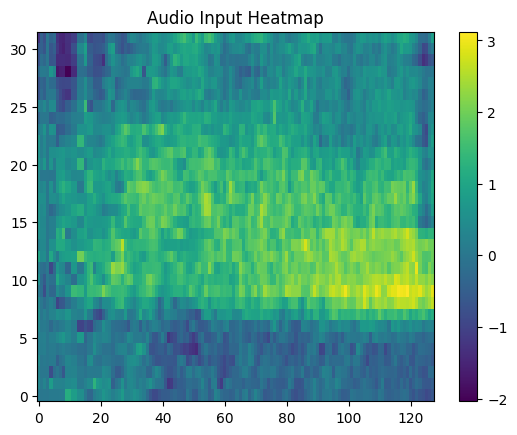

In [516]:
# heatmap of audio input[0][0]
import matplotlib.pyplot as plt
plt.imshow(audio_input[1][4]-audio_input[1][5], aspect='auto', origin='lower')
plt.colorbar()
plt.title('Audio Input Heatmap')

### Test model output

In [517]:
logs = []
files = sorted(os.listdir(cls_path))
for file in files[0:2]:
    if file.endswith(".pkl"):
        print("loadeing", file)
        data = pkl.load(open(os.path.join(cls_path, file), "rb"))
        logs.append(data)
        break

loadeing forward_embeddings_0.pkl


In [518]:
df = pd.DataFrame()
for batch in logs:
    df = pd.concat([df, pd.DataFrame(batch)], ignore_index=True)

# sample size
df = df.sample(n=min(df.shape[0],32), random_state=42)

In [519]:
df.head()

,video_name,label,audio_out,video_out,cls_a,cls_v
1,fakesync-data-vgg_test-original-YhbykmhIeDg_00...,tensor(0.),"[[[-0.7279049, -0.74903274, -0.057873283, 1.97...","[[[-1.149137, -2.3244534, -2.146084, 1.9885937...","[[-0.16212927, -1.0364348, -0.9032682, 1.46260...","[[-1.3568994, -1.4660679, -1.896082, 1.9994459..."
3,fakesync-data-vgg_test-original-1hjy0G_bLVw_30...,tensor(1.),"[[[0.06735338, -0.92166454, -0.10716362, 1.272...","[[[-1.1246992, -1.5623773, -2.328027, 0.359300...","[[0.13523434, -1.296786, -0.02480157, 0.566971...","[[-1.1062317, -1.3723017, -2.0137439, 1.279874..."
0,fakesync-data-vgg_test-original-TVU9qDQWK94_00...,tensor(0.),"[[[-0.8649435, -0.7754804, 0.29881635, 2.36421...","[[[-1.0731703, -3.1269047, -1.5434096, 1.05684...","[[-0.14667287, -0.89455676, -0.2263177, 1.7528...","[[-1.0935185, -1.3346119, -1.169812, 1.5794127..."
2,fakesync-data-vgg_test-original-Ck0uUyyO3ho_30...,tensor(1.),"[[[0.9390349, 0.30168942, 0.4668901, -0.346085...","[[[0.014520084, -1.2478259, -0.17974986, 0.526...","[[0.81037337, -0.33409142, 0.24792269, 0.34353...","[[-0.6502732, -0.774504, -1.700611, 0.55542886..."


In [520]:
for col in df.columns:
    print(col, df[col].iloc[0].shape if isinstance(df[col].iloc[0], np.ndarray) else df[col].iloc[0])

video_name fakesync-data-vgg_test-original-YhbykmhIeDg_000901
label tensor(0.)
audio_out (16, 16, 768)
video_out (16, 196, 768)
cls_a (16, 768)
cls_v (16, 768)


In [521]:
idx = 0
cls_v = torch.tensor(df.cls_v.iloc[idx])
cls_a = torch.tensor(df.cls_a.iloc[idx])

In [522]:
cls_a.shape

torch.Size([16, 768])

In [523]:
print("cls_a")
print(cls_a)
print((cls_a[0:16] - cls_a[0]).abs())
print("cls_v")
print(cls_v)
print((cls_v[0:16] - cls_v[0]).abs())

cls_a
tensor([[-0.1621, -1.0364, -0.9033,  1.4626, -0.2012,  ..., -1.4896, -1.2094, -0.8653,  2.4780,  2.1257],
        [-0.1974, -1.3136, -0.3796,  1.1756, -0.2785,  ..., -1.9172, -0.9799, -0.7516,  2.6879,  2.4328],
        [-0.3503, -1.2349, -0.1076,  0.7069, -0.0946,  ..., -1.7799, -0.3844, -0.1640,  2.5805,  1.9431],
        [-0.3284, -1.1490, -0.3041,  1.1381, -0.0851,  ..., -1.7914, -0.6611, -0.7318,  2.7348,  2.2515],
        [-0.3496, -1.3722,  0.1744,  1.1134,  0.1860,  ..., -2.0066, -0.5409, -0.1187,  2.8153,  2.1390],
        ...,
        [-0.2016, -1.4059, -0.3036,  0.8028,  0.0753,  ..., -1.8682, -0.4260, -0.3108,  2.7402,  2.1273],
        [-0.3368, -1.2849, -0.1766,  0.8831, -0.2335,  ..., -1.4408, -0.3605, -0.3458,  2.6963,  1.9156],
        [-0.2485, -1.1363,  0.0708,  1.6694, -0.1570,  ..., -1.8404, -0.9061, -0.6668,  3.0367,  2.6345],
        [-0.2018, -1.0207, -0.2632,  1.8036,  0.0151,  ..., -1.8208, -0.8163, -0.7732,  2.4312,  2.2922],
        [-0.1532, -1.1113, 

In [524]:
cls_a.abs().sum(), cls_v.abs().sum()

(tensor(9709.8594), tensor(9746.5850))

In [525]:
np.mean(df.cls_a.iloc[0], axis=1)
# only first entry similar

array([-0.        ,  0.        , -0.00000001, -0.00000001,  0.00000001, ...,  0.00000001,  0.        , -0.00000001,  0.00000001,  0.00000001], shape=(16,), dtype=float32)

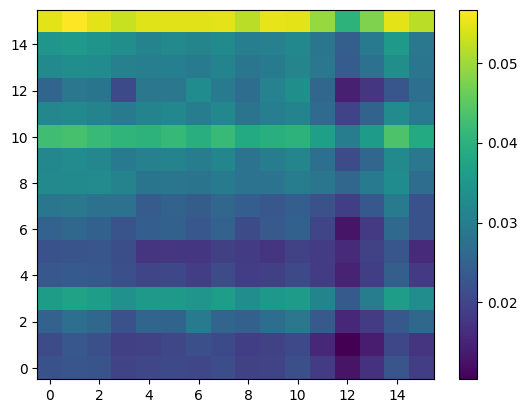

In [ ]:
idx = 2
# import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
# do per time step the cosine sim between cls_a and cls_b



cos_sim = cosine_similarity(
    df.cls_a.iloc[idx],
    df.cls_v.iloc[idx]
)
# plt plot heatmap
plt.imshow(X=cos_sim, aspect='auto', origin='lower')
plt.colorbar()


In [553]:
cls_a

tensor([[-0.1621, -1.0364, -0.9033,  1.4626, -0.2012,  ..., -1.4896, -1.2094, -0.8653,  2.4780,  2.1257],
        [-0.1974, -1.3136, -0.3796,  1.1756, -0.2785,  ..., -1.9172, -0.9799, -0.7516,  2.6879,  2.4328],
        [-0.3503, -1.2349, -0.1076,  0.7069, -0.0946,  ..., -1.7799, -0.3844, -0.1640,  2.5805,  1.9431],
        [-0.3284, -1.1490, -0.3041,  1.1381, -0.0851,  ..., -1.7914, -0.6611, -0.7318,  2.7348,  2.2515],
        [-0.3496, -1.3722,  0.1744,  1.1134,  0.1860,  ..., -2.0066, -0.5409, -0.1187,  2.8153,  2.1390],
        ...,
        [-0.2016, -1.4059, -0.3036,  0.8028,  0.0753,  ..., -1.8682, -0.4260, -0.3108,  2.7402,  2.1273],
        [-0.3368, -1.2849, -0.1766,  0.8831, -0.2335,  ..., -1.4408, -0.3605, -0.3458,  2.6963,  1.9156],
        [-0.2485, -1.1363,  0.0708,  1.6694, -0.1570,  ..., -1.8404, -0.9061, -0.6668,  3.0367,  2.6345],
        [-0.2018, -1.0207, -0.2632,  1.8036,  0.0151,  ..., -1.8208, -0.8163, -0.7732,  2.4312,  2.2922],
        [-0.1532, -1.1113, -0.530

In [574]:
cls_a_t = np.array(df.cls_a)
cls_v_t = np.array(df.cls_v)

In [576]:
def sim(a, b):
    # compute for each pair of samples the dot product and diagonal
    # return np.einsum('bij,bij->b', a, b) / a.shape[1]
    # return a.dot(b.T).diagonal().mean()
    return (a @ b.T).diagonal().mean()

# sim(torch.tensor(df.cls_a), torch.tensor(df.cls_v))
matrix = [[0] * cls_a_t.shape[0] for _ in range(cls_v_t.shape[0])]
for i, v in enumerate(cls_v_t):
    for j, a in enumerate(cls_a_t):
        matrix[i][j] = sim(a, v)
np.array(matrix)

array([[ 8.279183 , 15.0450535, -1.3454709, 21.351273 ],
       [12.611807 ,  8.123947 , 23.773487 ,  0.7396028],
       [26.654753 , 15.754172 , 21.347113 , 23.519997 ],
       [17.008335 , 15.896589 , 30.913378 ,  4.3801236]], shape=(4, 4), dtype=float32)

In [527]:
import numpy as np
A = np.array(df.cls_a.iloc[0])  # shape (T, D)
V = np.array(df.cls_v.iloc[0])  # shape (T, D)
# A, V: shape (T, D)
A_norm = A / np.linalg.norm(A, axis=1, keepdims=True)
V_norm = V / np.linalg.norm(V, axis=1, keepdims=True)

# elementwise dot product across features → cosine similarity per timestep
similarities = np.sum(A_norm * V_norm, axis=1)  # shape (T,)
similarities

array([ 0.01459246,  0.00775246,  0.02317328,  0.00476588,  0.01161767, ...,  0.00130645,  0.0120361 , -0.01683834, -0.00376105,  0.01438148], shape=(16,), dtype=float32)

In [528]:
import random

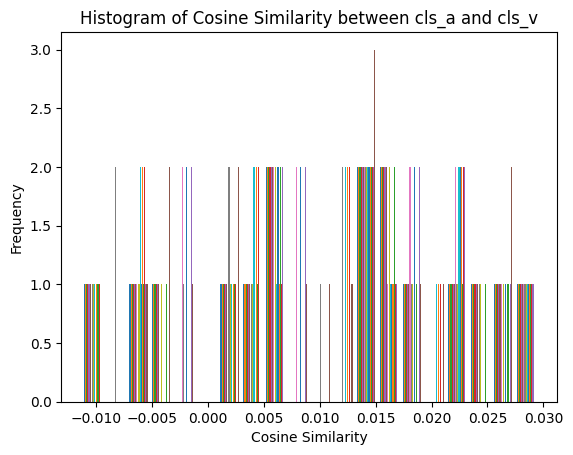

In [529]:
idx = 0
a = df.cls_a.iloc[idx]
b = df.cls_v.iloc[idx]
b_shuffled = b
random.shuffle(b_shuffled)
y = cosine_similarity(a, b)
# histogram of y
import matplotlib.pyplot as plt

plt.hist(y, bins=20)
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Similarity between cls_a and cls_v')
plt.show()

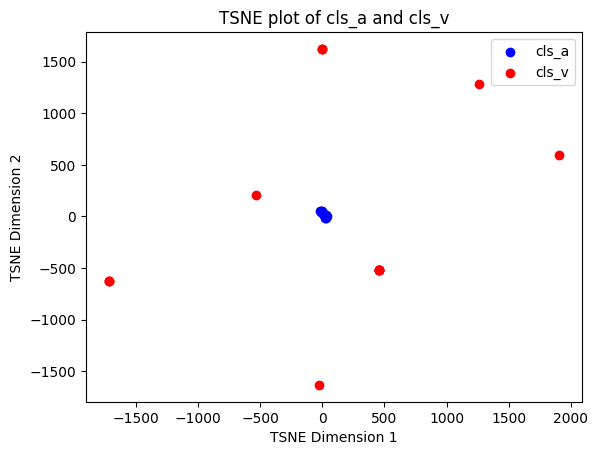

In [530]:
# tsne plot of cls_a and cls_v
from sklearn.manifold import TSNE   
import numpy as np
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
a_2d = tsne.fit_transform(a)

# scatter plot of a_2d
plt.scatter(a_2d[:, 0], a_2d[:, 1], c='blue', label='cls_a')
b_2d = tsne.fit_transform(b)
plt.scatter(b_2d[:, 0], b_2d[:, 1], c='red', label='cls_v')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title('TSNE plot of cls_a and cls_v')
plt.legend()

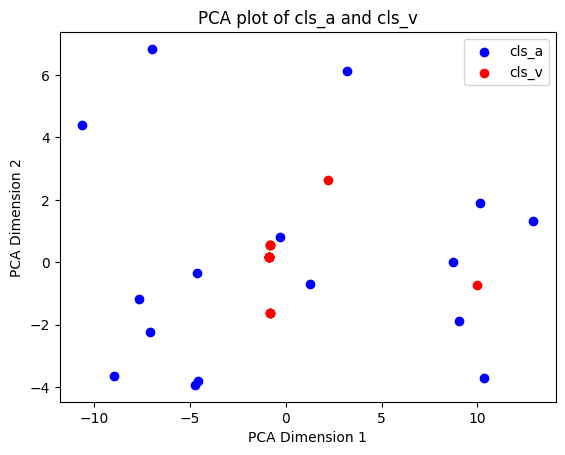

In [531]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
a_2d_pca = pca.fit_transform(a)
b_2d_pca = pca.fit_transform(b)
# scatter plot of a_2d_pca and b_2d_pca
plt.scatter(a_2d_pca[:, 0], a_2d_pca[:, 1], c='blue', label='cls_a')
plt.scatter(b_2d_pca[:, 0], b_2d_pca[:, 1], c='red', label='cls_v')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('PCA plot of cls_a and cls_v')
plt.legend()
plt.show()

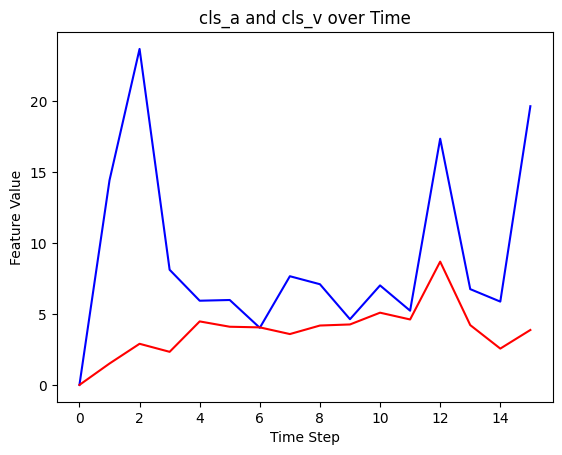

In [532]:
idx = 2
a = df.cls_a.iloc[idx]
b = df.cls_v.iloc[idx]
# plot cls_a and cls_v over time
# for i in range(a.shape[1]):
    # plt.plot(a[:, i], label='cls_a dim {}'.format(i), color='blue', alpha=0.05)
    # plt.plot(b[:, i], label='cls_v dim {}'.format(i), color='red', alpha=0.05)
a_diff = a - a[0]
b_diff = b - b[0]
# plot l2 norm of a_diff and b_diff over time
plt.plot(np.linalg.norm(a_diff, axis=1), label='cls_a', color='blue')
plt.plot(np.linalg.norm(b_diff, axis=1), label='cls_v', color='red')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('cls_a and cls_v over Time')
# plt.legend(None)
plt.show()

In [533]:
audio_mean = torch.tensor(df.cls_a).mean(dim=1)

In [534]:
video_mean = torch.tensor(df.cls_v).mean(dim=1)

np.float32(21.347113)

In [540]:
np.dot(audio_mean, video_mean.T)

/tmp/ipykernel_3498383/1828712813.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.dot(audio_mean, video_mean.T)


array([[ 8.322507  , 12.577977  , 26.74531   , 16.894247  ],
       [15.131147  ,  8.144026  , 15.6547    , 15.918916  ],
       [-1.3153172 , 23.754267  , 21.76546   , 30.617992  ],
       [21.269844  ,  0.65295696, 23.538593  ,  4.3345733 ]], shape=(4, 4), dtype=float32)